In [18]:
import torch
import numpy as np
import pandas as pd
import  random
import matplotlib.pyplot as plt

# 自定义数据集

In [19]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [20]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.2710, -0.8688]) 
label: tensor([6.6099])


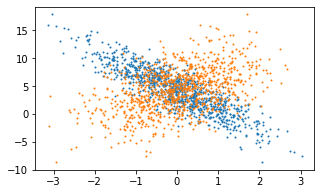

In [21]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);
plt.scatter(features[:, (0)].detach().numpy(), labels.detach().numpy(), 1);

# 读取数据集

In [22]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [23]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.6304,  1.2771],
        [ 0.0514,  0.3965],
        [-0.5104,  0.4039],
        [ 0.1585, -0.0396],
        [-1.5831, -0.0318],
        [ 0.3474,  0.9217],
        [ 0.4974,  0.1073],
        [ 0.9297,  0.9097],
        [ 1.1626,  0.2200],
        [ 0.0099,  0.3922]]) 
 tensor([[-3.3906],
        [ 2.9792],
        [ 1.7953],
        [ 4.6436],
        [ 1.1319],
        [ 1.7607],
        [ 4.8214],
        [ 2.9599],
        [ 5.7707],
        [ 2.8714]])


# 初始化参数

In [24]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 定义模型

In [25]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

# 定义损失函数

In [26]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

# 定义优化算法

In [27]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

# 训练

In [28]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.034313
epoch 2, loss 0.000115
epoch 3, loss 0.000043


In [29]:
w, b

(tensor([[ 2.0007],
         [-3.4000]], requires_grad=True),
 tensor([4.1995], requires_grad=True))

In [30]:
true_w, true_b

(tensor([ 2.0000, -3.4000]), 4.2)

In [31]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-7.2432e-04,  1.2636e-05], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0005], grad_fn=<RsubBackward1>)
